# Clase 4 - Segmentacion
![picture](https://drive.google.com/uc?id=1Ar6KpqlsLxcLlnOrXPx6QZejStP6bV9P)

## Pre requisitos

Se actualiza fastai descargando y ejecutando el script *colab*

In [1]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


Dar permiso para acceder a mi Drive

In [0]:
#from google.colab import drive
#drive.mount('/content/drive')

Nos aseguramos que cualquier cambio en una librería es recargado automáticamente y que que cualquier gráfica o imagen se muestre aquí

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Importamos las librerías necesarias

In [0]:
from fastai.vision import *
from fastai.callbacks.hooks import *
from fastai.utils.mem import *

## Curso 4 - Segmentacion

### Descarga del dataset

In [5]:
path = untar_data(URLs.CAMVID)
path.ls()

[PosixPath('/root/.fastai/data/camvid/codes.txt'),
 PosixPath('/root/.fastai/data/camvid/valid.txt'),
 PosixPath('/root/.fastai/data/camvid/images'),
 PosixPath('/root/.fastai/data/camvid/labels')]

Analizamos qué nos hemos descargado

In [0]:
path_lbl = path/'labels'
path_img = path/'images'

In [7]:
path_img.ls()

[PosixPath('/root/.fastai/data/camvid/images/0001TP_008970.png'),
 PosixPath('/root/.fastai/data/camvid/images/0001TP_008190.png'),
 PosixPath('/root/.fastai/data/camvid/images/0016E5_00540.png'),
 PosixPath('/root/.fastai/data/camvid/images/Seq05VD_f03000.png'),
 PosixPath('/root/.fastai/data/camvid/images/0016E5_05430.png'),
 PosixPath('/root/.fastai/data/camvid/images/Seq05VD_f00660.png'),
 PosixPath('/root/.fastai/data/camvid/images/0001TP_007950.png'),
 PosixPath('/root/.fastai/data/camvid/images/Seq05VD_f00630.png'),
 PosixPath('/root/.fastai/data/camvid/images/0016E5_07981.png'),
 PosixPath('/root/.fastai/data/camvid/images/Seq05VD_f02760.png'),
 PosixPath('/root/.fastai/data/camvid/images/0016E5_07260.png'),
 PosixPath('/root/.fastai/data/camvid/images/0016E5_08121.png'),
 PosixPath('/root/.fastai/data/camvid/images/Seq05VD_f04560.png'),
 PosixPath('/root/.fastai/data/camvid/images/0016E5_08550.png'),
 PosixPath('/root/.fastai/data/camvid/images/0001TP_006810.png'),
 PosixPath(

In [8]:
path_lbl.ls()

[PosixPath('/root/.fastai/data/camvid/labels/0016E5_08153_P.png'),
 PosixPath('/root/.fastai/data/camvid/labels/0016E5_06090_P.png'),
 PosixPath('/root/.fastai/data/camvid/labels/0001TP_009390_P.png'),
 PosixPath('/root/.fastai/data/camvid/labels/0001TP_009510_P.png'),
 PosixPath('/root/.fastai/data/camvid/labels/0016E5_00480_P.png'),
 PosixPath('/root/.fastai/data/camvid/labels/0006R0_f02670_P.png'),
 PosixPath('/root/.fastai/data/camvid/labels/0016E5_08067_P.png'),
 PosixPath('/root/.fastai/data/camvid/labels/0006R0_f01770_P.png'),
 PosixPath('/root/.fastai/data/camvid/labels/0001TP_008280_P.png'),
 PosixPath('/root/.fastai/data/camvid/labels/Seq05VD_f02520_P.png'),
 PosixPath('/root/.fastai/data/camvid/labels/Seq05VD_f03330_P.png'),
 PosixPath('/root/.fastai/data/camvid/labels/Seq05VD_f03000_P.png'),
 PosixPath('/root/.fastai/data/camvid/labels/0016E5_01770_P.png'),
 PosixPath('/root/.fastai/data/camvid/labels/Seq05VD_f00960_P.png'),
 PosixPath('/root/.fastai/data/camvid/labels/0001

Parece que la imagen segmentada tiene el mismo nombre que la imagen sin segmentar más '_P'

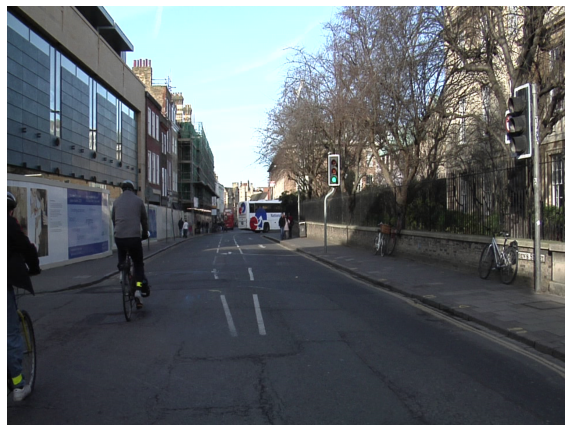

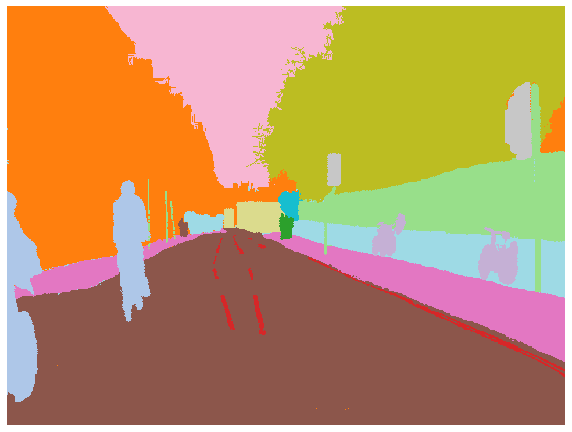

In [9]:
sin_segmentar = open_image(path_img/'0016E5_08137.png')
segmentada    = open_mask(path_lbl/'0016E5_08137_P.png')
sin_segmentar.show(figsize=(10,10))
segmentada.show(figsize=(10,10), alpha=1)

`valid.txt` son las imágenes para validación

In [10]:
!cat /root/.fastai/data/camvid/valid.txt

0016E5_07959.png
0016E5_07961.png
0016E5_07963.png
0016E5_07965.png
0016E5_07967.png
0016E5_07969.png
0016E5_07971.png
0016E5_07973.png
0016E5_07975.png
0016E5_07977.png
0016E5_07979.png
0016E5_07981.png
0016E5_07983.png
0016E5_07985.png
0016E5_07987.png
0016E5_07989.png
0016E5_07991.png
0016E5_07993.png
0016E5_07995.png
0016E5_07997.png
0016E5_07999.png
0016E5_08001.png
0016E5_08003.png
0016E5_08005.png
0016E5_08007.png
0016E5_08009.png
0016E5_08011.png
0016E5_08013.png
0016E5_08015.png
0016E5_08017.png
0016E5_08019.png
0016E5_08021.png
0016E5_08023.png
0016E5_08025.png
0016E5_08027.png
0016E5_08029.png
0016E5_08031.png
0016E5_08033.png
0016E5_08035.png
0016E5_08037.png
0016E5_08039.png
0016E5_08041.png
0016E5_08043.png
0016E5_08045.png
0016E5_08047.png
0016E5_08049.png
0016E5_08051.png
0016E5_08053.png
0016E5_08055.png
0016E5_08057.png
0016E5_08059.png
0016E5_08061.png
0016E5_08063.png
0016E5_08065.png
0016E5_08067.png
0016E5_08069.png
0016E5_08071.png
0016E5_08073.png
0016E5_08075.p

Mientras que `codes.txt` son las clases en las que se segmentan las imágenes

In [11]:
!cat /root/.fastai/data/camvid/codes.txt

Animal
Archway
Bicyclist
Bridge
Building
Car
CartLuggagePram
Child
Column_Pole
Fence
LaneMkgsDriv
LaneMkgsNonDriv
Misc_Text
MotorcycleScooter
OtherMoving
ParkingBlock
Pedestrian
Road
RoadShoulder
Sidewalk
SignSymbol
Sky
SUVPickupTruck
TrafficCone
TrafficLight
Train
Tree
Truck_Bus
Tunnel
VegetationMisc
Void
Wall


### Se crea el dataset

Obtenemos los nombres de las imágenes

In [12]:
fnames = get_image_files(path_img)
fnames[:3]

[PosixPath('/root/.fastai/data/camvid/images/0001TP_008970.png'),
 PosixPath('/root/.fastai/data/camvid/images/0001TP_008190.png'),
 PosixPath('/root/.fastai/data/camvid/images/0016E5_00540.png')]

Los nombres de las etiquetas

In [13]:
lbl_names = get_image_files(path_lbl)
lbl_names[:3]

[PosixPath('/root/.fastai/data/camvid/labels/0016E5_08153_P.png'),
 PosixPath('/root/.fastai/data/camvid/labels/0016E5_06090_P.png'),
 PosixPath('/root/.fastai/data/camvid/labels/0001TP_009390_P.png')]

Como hemos visto antes, el nombre de una imagen segmentada es el de la imagen sin segmentar más '_P'. 

Por lo que creamos una función para obtener el nombre de la imagen segmentada a partir del nombre de la imagen sin segmentar

In [0]:
# Con x.stem obtenemos el nombre de un archivo sin su extensión
# Con x.suffix obtenemos la extensión de un archivo

# Construimos el nombre de la imagen segmentada mediante su path (path_lbl), más 
# el nombre de la imagen sin segmentar (x.stem), más '_P' y más la extensión
get_y_fn = lambda x: path_lbl/f'{x.stem}_P{x.suffix}'

Vemos una imagen sin segmentar

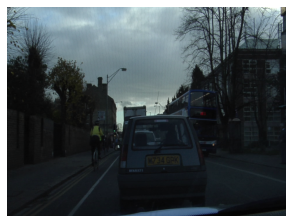

In [15]:
img_f = fnames[0]
img = open_image(img_f)
img.show(figsize=(5,5))

Vemos la misma imagen segmentada

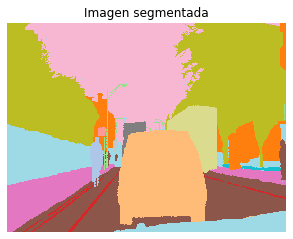

In [16]:
mask = open_mask(get_y_fn(img_f))
mask.show(figsize=(5,5), alpha=1, title='Imagen segmentada')

In [17]:
doc(mask.show)

Vemos como son las matrices de las imágenes segmentadas y sin segmentar

In [18]:
img_size = np.array(img.shape[1:])
src_size = np.array(mask.shape[1:])

print(img_size)
print(src_size)

[720 960]
[720 960]


In [19]:
print(img.shape)
img.data

torch.Size([3, 720, 960])


tensor([[[0.2784, 0.4667, 0.3373,  ..., 0.4471, 0.2863, 0.2039],
         [0.2667, 0.3765, 0.2667,  ..., 0.4510, 0.2902, 0.2314],
         [0.2078, 0.2431, 0.1608,  ..., 0.4471, 0.2824, 0.2275],
         ...,
         [0.0627, 0.0588, 0.0627,  ..., 0.1137, 0.1137, 0.1059],
         [0.0588, 0.0588, 0.0588,  ..., 0.0980, 0.0941, 0.0902],
         [0.0510, 0.0510, 0.0588,  ..., 0.0902, 0.0902, 0.0824]],

        [[0.2941, 0.4824, 0.3647,  ..., 0.4431, 0.2902, 0.2078],
         [0.2902, 0.4000, 0.2902,  ..., 0.4471, 0.2941, 0.2353],
         [0.2314, 0.2667, 0.1843,  ..., 0.4431, 0.2824, 0.2275],
         ...,
         [0.0627, 0.0588, 0.0627,  ..., 0.1529, 0.1529, 0.1451],
         [0.0588, 0.0588, 0.0588,  ..., 0.1373, 0.1333, 0.1294],
         [0.0510, 0.0510, 0.0588,  ..., 0.1216, 0.1216, 0.1137]],

        [[0.2745, 0.4627, 0.3294,  ..., 0.3725, 0.2902, 0.2078],
         [0.2667, 0.3765, 0.2667,  ..., 0.3765, 0.2941, 0.2353],
         [0.2235, 0.2588, 0.1765,  ..., 0.3725, 0.2745, 0.

In [20]:
print(mask.shape)
mask.data

torch.Size([1, 720, 960])


tensor([[[26, 26, 26,  ...,  4,  4,  4],
         [26, 26, 26,  ...,  4,  4,  4],
         [26, 26, 26,  ...,  4,  4,  4],
         ...,
         [19, 19, 19,  ..., 30, 30, 30],
         [19, 19, 19,  ..., 30, 30, 30],
         [19, 19, 19,  ..., 30, 30, 30]]])

Obtenemos los códigos de los números

In [21]:
codes = np.loadtxt(path/'codes.txt', dtype=str); codes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car', 'CartLuggagePram', 'Child', 'Column_Pole',
       'Fence', 'LaneMkgsDriv', 'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving', 'ParkingBlock',
       'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk', 'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel', 'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

Podemos ver que el 21 corresponde al cielo

In [22]:
codes[21]

'Sky'

Se calcula el batch size en función de la RAM de la GPU



In [23]:
size = src_size//2

free = gpu_mem_get_free_no_cache()

# the max size of bs depends on the available GPU RAM
if free > 8200: bs=8
else:           bs=4
print(f"Usamos un bs={bs}, tenemos {free} MB de RAM en la GPU libres")

Usamos un bs=8, tenemos 16270 MB de RAM en la GPU libres


Crreamos el dataset

In [0]:
src = (SegmentationItemList.from_folder(path_img)
       .split_by_fname_file('../valid.txt')
       .label_from_func(get_y_fn, classes=codes))

Al hacer las transformaciones indicamos que se hagan las mismas en la imagen segmentada

In [0]:
data = (src.transform(get_transforms(), size=size, tfm_y=True)
        .databunch(bs=bs)
        .normalize(imagenet_stats))

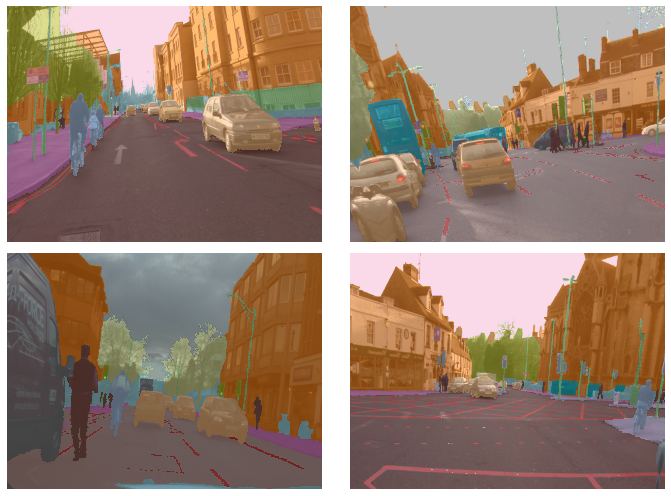

In [29]:
data.show_batch(2, figsize=(10,7))

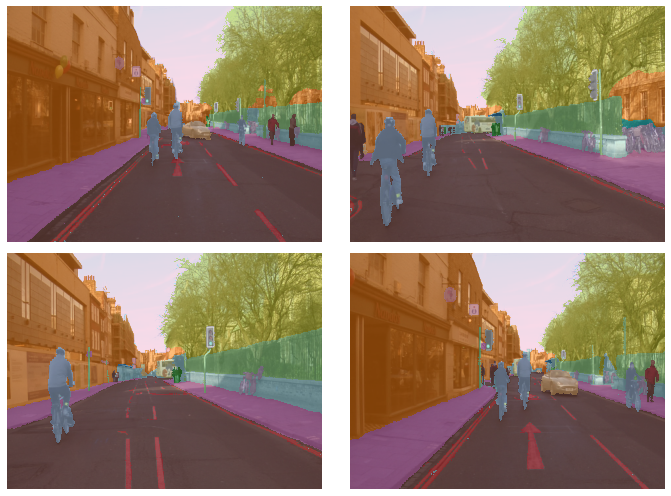

In [30]:
data.show_batch(2, figsize=(10,7), ds_type=DatasetType.Valid)

### Se crea el modelo

Se crea un diccionario con los códigos

In [31]:
name2id = {v:k for k,v in enumerate(codes)}
void_code = name2id['Void']

name2id

{'Animal': 0,
 'Archway': 1,
 'Bicyclist': 2,
 'Bridge': 3,
 'Building': 4,
 'Car': 5,
 'CartLuggagePram': 6,
 'Child': 7,
 'Column_Pole': 8,
 'Fence': 9,
 'LaneMkgsDriv': 10,
 'LaneMkgsNonDriv': 11,
 'Misc_Text': 12,
 'MotorcycleScooter': 13,
 'OtherMoving': 14,
 'ParkingBlock': 15,
 'Pedestrian': 16,
 'Road': 17,
 'RoadShoulder': 18,
 'SUVPickupTruck': 22,
 'Sidewalk': 19,
 'SignSymbol': 20,
 'Sky': 21,
 'TrafficCone': 23,
 'TrafficLight': 24,
 'Train': 25,
 'Tree': 26,
 'Truck_Bus': 27,
 'Tunnel': 28,
 'VegetationMisc': 29,
 'Void': 30,
 'Wall': 31}

Se crea la función con la que se harán las métricas

In [0]:
def acc_camvid(input, target):
    target = target.squeeze(1)  # The output array is input array, but with all or a subset of the dimensions of length 1 removed
    mask = target != void_code
    return (input.argmax(dim=1)[mask]==target[mask]).float().mean()

In [0]:
metrics=acc_camvid

In [0]:
# weight decay
wd=1e-2

Se define el modelo

![unet](https://lmb.informatik.uni-freiburg.de/people/ronneber/u-net/u-net-architecture.png)

In [35]:
doc(unet_learner)

In [37]:
# cnn_learner
learn = unet_learner(data, models.resnet34, metrics=metrics, wd=wd)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


### Entrenamiento

#### Imagenes reducidas

In [39]:
print(src_size)
print(size)

[720 960]
[360 480]


In [0]:
lr_find(learn)
learn.recorder.plot()

In [0]:
lr=3e-3

In [42]:
doc(learn.fit_one_cycle)

In [44]:
learn.fit_one_cycle(10, slice(lr), pct_start=0.9)

epoch,train_loss,valid_loss,acc_camvid,time
0,1.267565,0.877245,0.793975,00:57
1,0.851998,0.577589,0.843083,00:49
2,0.742101,0.630690,0.837617,00:49
3,0.646480,0.516095,0.861017,00:49
4,0.631830,0.586274,0.853808,00:49
5,0.593311,0.455307,0.873219,00:49
6,0.560751,0.482417,0.875253,00:49
7,0.555829,0.593293,0.855414,00:49
8,0.555472,0.415298,0.893643,00:49
9,0.462276,0.358695,0.896307,00:49


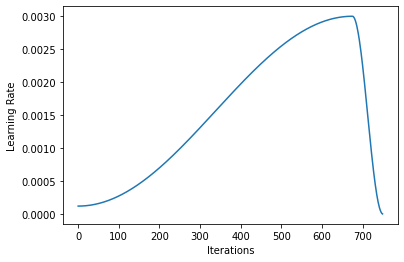

In [46]:
learn.recorder.plot_lr()

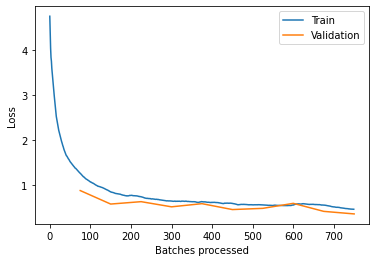

In [47]:
learn.recorder.plot_losses()

In [0]:
learn.save('stage-1')

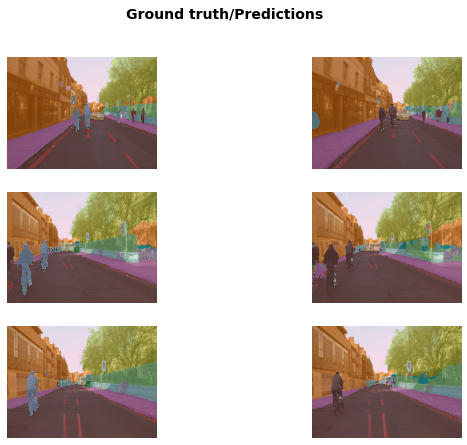

In [49]:
learn.show_results(rows=3, figsize=(10,7))

In [50]:
learn.unfreeze()
lrs = slice(lr/400,lr/4)
learn.fit_one_cycle(12, lrs, pct_start=0.8)

epoch,train_loss,valid_loss,acc_camvid,time
0,0.392741,0.335380,0.899774,00:50
1,0.382675,0.333754,0.900045,00:50
2,0.364896,0.329707,0.901204,00:50
3,0.359173,0.311046,0.906295,00:50
4,0.351367,0.304316,0.913067,00:50
5,0.343190,0.312280,0.904103,00:50
6,0.329040,0.304343,0.914090,00:50
7,0.318846,0.302171,0.911148,00:50
8,0.313192,0.307073,0.912048,00:50
9,0.304244,0.305437,0.916827,00:50


In [51]:
print(lr/400)
print(lr/4)

7.5e-06
0.00075


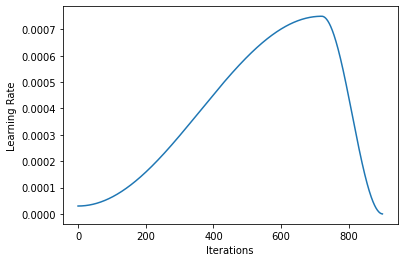

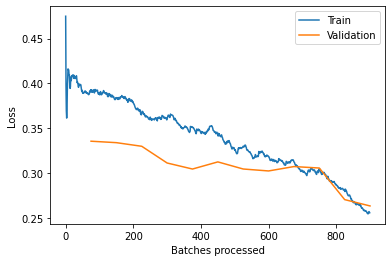

In [52]:
learn.recorder.plot_lr()
learn.recorder.plot_losses()

In [0]:
learn.save('stage-2');

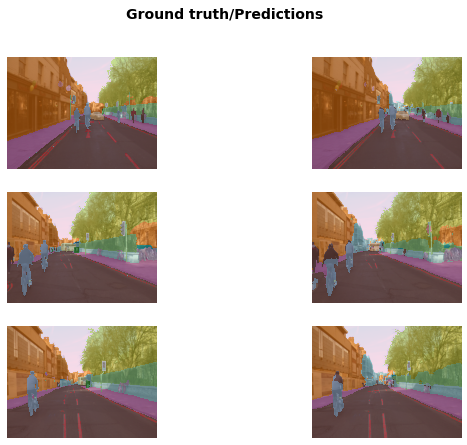

In [54]:
learn.show_results(rows=3, figsize=(10,7))

In [0]:
drive_folder = '/content/drive/My\ Drive/Colab\ Notebooks/Curso\ fastai/04\ Segmentacion'

In [0]:
!cp /content/data/camvid/images/models/stage-2.pth {drive_folder}

#### Imagenes a tamaño real

##### Reinicio del kernel

Para evitar problemas de 'out of memory' es necesario reiniciar el kernel y volver a ejecutar algunas celdas para volver a tener algunas variables

In [1]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.callbacks.hooks import *
from fastai.utils.mem import *

In [4]:
path = untar_data(URLs.CAMVID)
path_lbl = path/'labels'
path_img = path/'images'

In [0]:
drive_folder = '/content/drive/My\ Drive/Colab\ Notebooks/Curso\ fastai/04\ Segmentacion'

In [0]:
!mkdir /content/data/camvid/images/models

In [0]:
!cp {drive_folder}/stage-2.pth /content/data/camvid/images/models

In [5]:
fnames = get_image_files(path_img)
fnames[:3]

[PosixPath('/root/.fastai/data/camvid/images/0001TP_008970.png'),
 PosixPath('/root/.fastai/data/camvid/images/0001TP_008190.png'),
 PosixPath('/root/.fastai/data/camvid/images/0016E5_00540.png')]

In [6]:
lbl_names = get_image_files(path_lbl)
lbl_names[:3]

[PosixPath('/root/.fastai/data/camvid/labels/0016E5_08153_P.png'),
 PosixPath('/root/.fastai/data/camvid/labels/0016E5_06090_P.png'),
 PosixPath('/root/.fastai/data/camvid/labels/0001TP_009390_P.png')]

In [0]:
get_y_fn = lambda x: path_lbl/f'{x.stem}_P{x.suffix}'

In [0]:
img_f = fnames[0]
mask = open_mask(get_y_fn(img_f))

In [0]:
src_size = np.array(mask.shape[1:])

In [0]:
codes = np.loadtxt(path/'codes.txt', dtype=str);

In [0]:
src = (SegmentationItemList.from_folder(path_img)
       .split_by_fname_file('../valid.txt')
       .label_from_func(get_y_fn, classes=codes))

In [0]:
name2id = {v:k for k,v in enumerate(codes)}
void_code = name2id['Void']

def acc_camvid(input, target):
    target = target.squeeze(1)
    mask = target != void_code
    return (input.argmax(dim=1)[mask]==target[mask]).float().mean()

In [0]:
metrics=acc_camvid
wd=1e-2

##### Entrenamiento

In [14]:
#learn.destroy()

size = src_size

free = gpu_mem_get_free_no_cache()
# the max size of bs depends on the available GPU RAM
if free > 8200: bs=3
else:           bs=1
print(f"Usamos un bs={bs}, tenemos {free} MB de RAM en la GPU libres")

Usamos un bs=3, tenemos 15068 MB de RAM en la GPU libres


In [15]:
print(src_size)
print(size)

[720 960]
[720 960]


In [0]:
data = (src.transform(get_transforms(), size=size, tfm_y=True)
        .databunch(bs=bs)
        .normalize(imagenet_stats))

In [17]:
learn = unet_learner(data, models.resnet34, metrics=metrics, wd=wd)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [0]:
learn.load('stage-2');

In [0]:
lr=1e-3

In [23]:
learn.fit_one_cycle(10, slice(lr), pct_start=0.8)

epoch,train_loss,valid_loss,acc_camvid,time
0,0.378975,0.346852,0.907004,05:54
1,0.347698,0.298176,0.914408,05:43
2,0.328704,0.294319,0.920917,05:43
3,0.325266,0.335930,0.911252,05:43
4,0.351108,0.327205,0.908361,05:43
5,0.333868,0.281723,0.927850,05:43
6,0.316390,0.288495,0.919105,05:42
7,0.310313,0.298741,0.925008,05:42
8,0.278060,0.272660,0.924551,05:41
9,0.231326,0.241530,0.933955,05:42


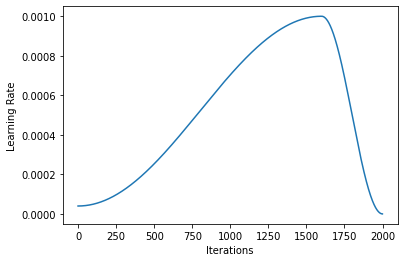

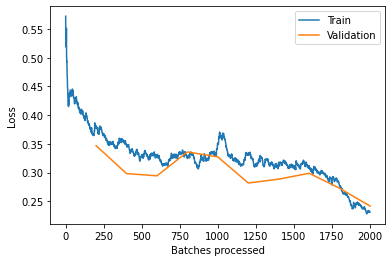

In [24]:
learn.recorder.plot_lr()
learn.recorder.plot_losses()

In [0]:
learn.save('stage-1-big')

In [0]:
learn.load('stage-1-big')

In [0]:
lrs = slice(1e-6,lr/10)

In [27]:
learn.unfreeze()
learn.fit_one_cycle(10, lrs)

epoch,train_loss,valid_loss,acc_camvid,time
0,0.224930,0.239997,0.934341,05:56
1,0.224422,0.237601,0.933423,05:56
2,0.215189,0.246180,0.933221,05:56
3,0.209217,0.254650,0.931694,05:56
4,0.209297,0.243307,0.934372,05:56
5,0.197951,0.255963,0.932727,05:56
6,0.197297,0.255065,0.932625,05:56
7,0.194661,0.250662,0.933964,05:56
8,0.186347,0.253645,0.933100,05:56
9,0.189251,0.252191,0.933421,05:56


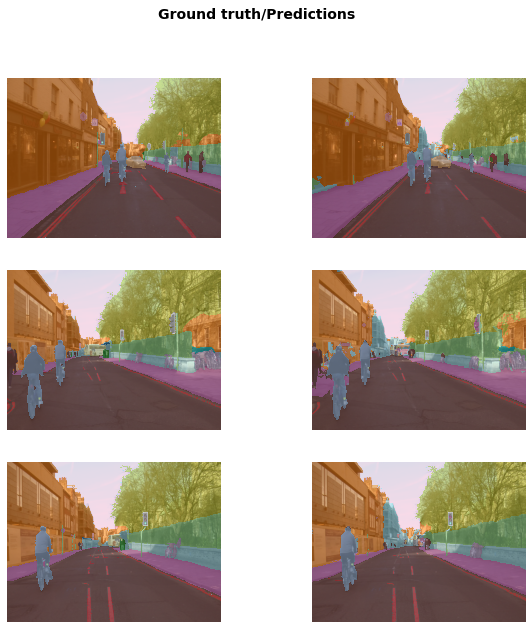

In [28]:
learn.show_results(rows=3, figsize=(10,10))

In [0]:
learn.save('stage-2-big')

In [0]:
learn.export()

### Copiar el modelo a nuestro Drive

In [0]:
drive_folder = '/content/drive/My\ Drive/Colab\ Notebooks/Curso\ fastai/04\ Segmentacion'

In [0]:
!mv /content/data/camvid/images/export.pkl /content/data/camvid/images/segmentacion.pkl

In [0]:
!cp /content/data/camvid/images/segmentacion.pkl {drive_folder}

In [0]:
print('fin')

fin
